<a href="https://colab.research.google.com/github/aminsamir45/MIT-9.53---Emergent-Computation-within-Distributed-Neural-Circuits/blob/main/PSET%202/Samir_Amin_9_53_pset2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 9.53 PSET 2

Samir Amin


In [ ]:
# First import libraries needed to solve the problem
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy import stats
import math
import pandas as pd
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Problem 1

## 1.1

---



In [ ]:
# Load the dataset
data = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/9.53/PSET 2/Iris.txt', delimiter=',', usecols=(0, 1, 2, 3))

# Separate and zero-mean the input features
X_data = data[:]
averages = np.mean(X_data, axis=0)
X_data = np.subtract(X_data, averages)
X_data_new = [np.asarray([row]) for row in X_data]

# get the class labels
y = np.array(['A'] * 50 + ['B'] * 50 + ['C'] * 50)

# Initialize weight matrix randomly
W = np.random.rand(4, 4)
print(f'Initial weights:\n{W}')

#Sanger's Rule
def sangers_rule(X, W, lr = 0.001):
    """ Sanger's Rule using random sampling.
    X = = column vector
    W = weight matrix """
    Y = W@X
    heb = X.T*Y
    lower_tri = np.tril(np.ones((4, 4), dtype=int))
    norm = Y*(lower_tri@(Y*W))
    delta_W = lr*(heb - norm)
    return delta_W

# Training
num_samps = 1000000
rand_ind = np.random.randint(0, len(X_data_new), size=num_samps)
for i in rand_ind:
    X = X_data_new[i].T
    delta_W = sangers_rule(X, W)
    W += delta_W

print(f'\nFinal weights:\n {W}\n')

print(f'Lengths of the Principal Components: \n {np.sqrt(np.sum(W*W, axis=1))}')

Initial weights:
[[0.0145562  0.68890941 0.57285762 0.62915522]
 [0.06582371 0.03950738 0.55457724 0.38045563]
 [0.47556075 0.28088179 0.49147715 0.92579321]
 [0.12953255 0.77415017 0.36232902 0.21823016]]

Final weights:
 [[ 0.36366263 -0.08076716  0.85649657  0.35749592]
 [-0.65688296 -0.73108204  0.17440112  0.06632908]
 [ 0.58565583 -0.59905436 -0.07936394 -0.54010419]
 [-0.31363095  0.3162714   0.47978392 -0.75584843]]

Lengths of the Principal Components: 
 [1.00008177 1.00039566 0.99993502 0.99994571]


## 1.2

The difference between Sanger's rule and Oja's multi-unit rule is that Sanger's rule updates weights based on simply the previous neurons while Oja's rule updates weights based on all the neurons in a system. Sanger's rule is a sequential update whereas Oja's rule simeltaneously updates all of the pricipal components. Thus, the components found using Sanger's rule always converge to the same weight vectors while Oja's rule does not. When the number of datapoints or outputs is equal to 1, both rules produce the same result.

## 1.3

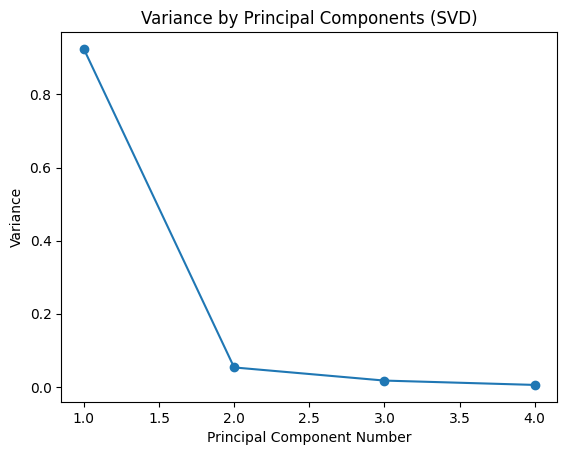

In [ ]:
# compute the singular value decomposition of the input data
U, s, Vt = np.linalg.svd(X_data)

# compute the variance captured by each principal component
variance = (s ** 2) / np.sum(s ** 2)

# plot
plt.plot(range(1, 5), variance[:4], '-o')
plt.xlabel('Principal Component Number')
plt.ylabel('Variance')
plt.title('Variance by Principal Components (SVD)')
plt.show()

## 1.4


In [ ]:
#Re-do process without subtracting mean value (using X_data instead of X_data_new)
# Process data
X_data_new = data[:]
X_data_no_ms = [np.asarray([row]) for row in X_data_new]

# Initialize weight matrix randomly
W_new = np.random.rand(4, 4)
print(f'Initial weights:\n{W}')

#Sanger's Rule
def sangers_rule(X, W, lr = 0.001):
    """ Sanger's Rule using random sampling.
    X = = column vector
    W = weight matrix """
    Y = W@X
    heb = X.T*Y
    lower_tri = np.tril(np.ones((4, 4), dtype=int))
    norm = Y*(lower_tri@(Y*W))
    delta_W = lr*(heb - norm)
    return delta_W

# Training
num_samps = 1000000
rand_ind = np.random.randint(0, len(X_data_no_ms), size=num_samps)
for i in rand_ind:
    X_no_ms = X_data_no_ms[i].T
    delta_W = sangers_rule(X_no_ms, W_new)
    W_new += delta_W

print(f'\nFinal weights (no mean sqaured):\n {W_new}\n')

print(f'Final weights (mean squared): \n {W}')

Initial weights:
[[ 3.3447311  -0.3585531 ]
 [ 2.67805374 -0.14873977]
 [ 2.41247143 -0.10176785]
 [ 2.12152025  0.01965786]
 [ 1.94979773  0.07038701]
 [ 2.03857372 -0.14975335]
 [ 1.60953533  0.13303844]
 [ 1.47422874  0.10387243]
 [ 1.26740606  0.06847422]
 [ 0.94676131  0.17710672]
 [ 0.86323909  0.12118264]
 [ 0.69149778  0.14294334]
 [ 0.35514208  0.33195623]
 [ 0.5265374   0.07338717]
 [ 0.30373681  0.18080494]
 [-0.33759662  0.55969094]
 [-0.92925568  0.72304606]
 [-2.5929916   0.46985862]
 [-2.68135515  0.25349362]
 [-2.65706434  0.06854282]
 [-2.69304131 -0.06085299]
 [-2.65161486 -0.28141075]
 [-2.58887581 -0.48394269]
 [-2.71097992 -0.60059814]
 [-2.61459096 -1.0397358 ]]

Final weights (no mean sqaured):
 [[ 0.76452078  0.40136306  0.48296016  0.14940423]
 [ 0.2774127   0.54798109 -0.70834592 -0.34327624]
 [-0.50101406  0.67669796  0.05457162  0.53572792]
 [-0.32249019  0.31855962  0.48023943 -0.74957914]]

Final weights (mean squared): 
 [[ 3.3447311  -0.3585531 ]
 [ 2.67

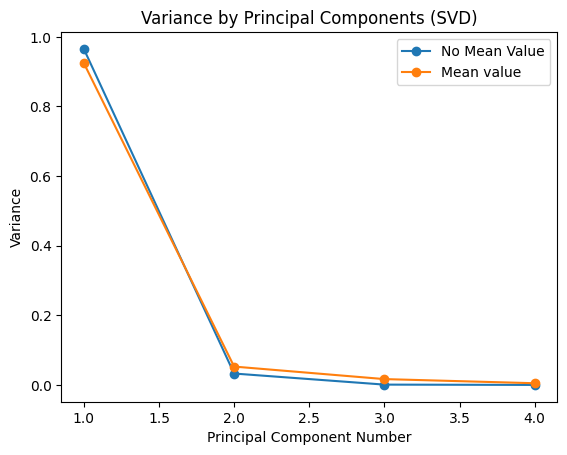

In [ ]:
# compute the singular value decomposition of the input data
U, s_new, Vt = np.linalg.svd(X_data_new)

# compute the variance captured by each principal component
variance_new = (s_new ** 2) / np.sum(s_new ** 2)

# plot
plt.plot(range(1, 5), variance_new[:4], '-o', label='No Mean Value')
plt.plot(range(1, 5), variance[:4], '-o', label="Mean value")
plt.legend()
plt.xlabel('Principal Component Number')
plt.ylabel('Variance')
plt.title('Variance by Principal Components (SVD)')
plt.show()

If the mean value is not subtracted from each feature, Sanger's rule does not find the proper PC's. It finds the eigenvectors of the correlation matrix. 

We subtract the mean of each feature from each datapoint within that feature because we are trying to find the patterns of variation within the PCA. That is how our set of basis vectors is formed in the PCA. 

The result of this is less informative data that does not reflect the actual variance.

## 1.5

In [ ]:
# Compute the covariance matrix
cov = np.cov(X_data.T)

# Compute the eigenvectors and eigenvalues of the covariance matrix
eigvals, eigvecs = np.linalg.eig(cov)

# Sort the eigenvectors in descending order of eigenvalues
idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

# Compare the eigenvectors to the principal components found by Sanger's rule
print("Sanger's rule principal components:")
print(W)
print("\nEigenvectors of covariance matrix:")
print(eigvecs.T)



Sanger's rule principal components:
[[ 0.37158044 -0.08691295  0.85262281  0.35721683]
 [-0.660294   -0.72586025  0.17518849  0.08297625]
 [ 0.576925   -0.60110383 -0.0730227  -0.54816477]
 [-0.31374394  0.31927781  0.47968424 -0.75472944]]

Eigenvectors of covariance matrix:
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [-0.65658877 -0.73016143  0.17337266  0.07548102]
 [-0.58202985  0.59791083  0.07623608  0.54583143]
 [ 0.31548719 -0.3197231  -0.47983899  0.75365743]]


The Principal Components found using Sanger's Rule are essentially the same as using eigenvectors and the covariance matrix. This makes sense.

## 1.6.1


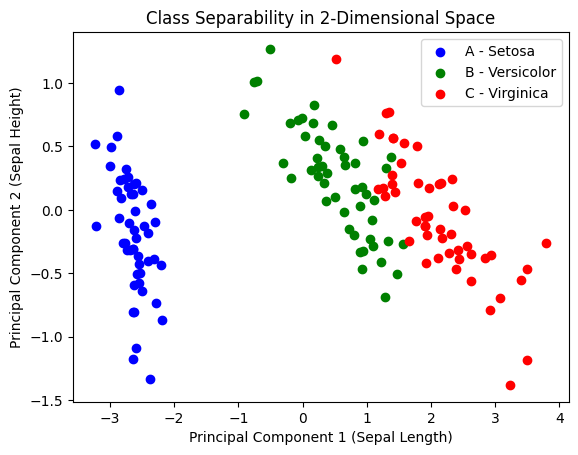

In [ ]:
# Load the dataset
data = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/9.53/PSET 2/Iris.txt', delimiter=',', usecols=(0, 1, 2, 3))

# Separate and zero-mean the input features
X_data = data[:]
averages = np.mean(X_data, axis=0)
X_data = np.subtract(X_data, averages)

pca = W[:2]
X_pca = np.dot(X_data, pca.T)

# Turn y into a color_array to easily plot
colors = {'A': 'red', 'B': 'green', 'C': 'blue'}
color_array = [colors[label] for label in y]

# Check if class A is linearly separable from the other two classes
plt.scatter(X_pca[:50,0], X_pca[:50,1], c='blue', label='A - Setosa')
plt.scatter(X_pca[50:100,0], X_pca[50:100,1], c='green', label='B - Versicolor')
plt.scatter(X_pca[100:,0], X_pca[100:,1], c='red', label='C - Virginica')

plt.xlabel('Principal Component 1 (Sepal Length)')
plt.ylabel('Principal Component 2 (Sepal Height)')
plt.title('Class Separability in 2-Dimensional Space')
plt.legend()
plt.show()

The class that was linearly separable from the other two (setosa) is still linearly separable as a 2-D datapoint. This is because if a dataset was linearly separable previously, then removing features will maintain its linear separability. We can also refer to the graphs above to compare PC1 and PC2 (sepal length vs sepal height) to see that this data is separable.

##1.6.2


The reason that reducing the dimensionality makes supervised learning easier computationally but not a good idea in the case of the perceptron is because reducing the dimensionalty of the data leads to the loss of information about features 

## Problem 2

#2.1


In [ ]:
# Neighborhood Function
def neighborhood(idx, winner, nodes, radius_0 = 2):
    radius = radius_0*np.exp(-idx/30000) + 0.5
    return np.array([[np.exp(-np.linalg.norm(i - winner) ** 2 / (2 * (radius ** 2)))] for i in range(nodes)])
    
nodes = 25
W = np.random.randn(nodes, 2)
print(f'Initial Weights:\n{W}')
iters = 100000
for idx in range(iters):
    x = X_pca[random.randint(0, len(X_pca)-1)].T
    y = np.abs(np.sum(x.T-W, axis=1, keepdims=True))
    winner = y.argmin()

    # weight update:
    lr_0 = 0.1
    lr = lr_0*np.exp(-idx/30000) + 0.01
    delta_W = lr*neighborhood(idx, winner, nodes)*(x.T-W)
    W += delta_W

# Get the SOM values
som_values = W
print(f'Final Weights:\n{som_values}')
# Sort the SOM values by their x-coordinate
som_values = som_values[som_values[:, 0].argsort()]

Initial Weights:
[[ 1.15883394 -1.35534083]
 [ 1.40026575  0.32186992]
 [-0.10768314 -1.80457723]
 [-0.89529072  1.17032636]
 [ 0.37573913  0.53095909]
 [ 2.68268441 -0.84134875]
 [-1.83266158 -0.06225094]
 [ 0.93104711  1.42023368]
 [-0.79867976 -0.0616118 ]
 [ 0.63986861 -0.69225965]
 [ 0.05820914  1.87704626]
 [ 0.62984775 -1.24398433]
 [ 2.13337887 -0.64094452]
 [ 1.73646306 -0.75802787]
 [-0.81701178 -0.81855973]
 [ 2.16606343  0.90602758]
 [-0.37414427  0.26814572]
 [ 1.38296384  0.46638888]
 [-1.42653909 -1.16241204]
 [ 0.49995788  2.76732506]
 [-1.07679357 -1.22613148]
 [-1.56213388 -0.5218683 ]
 [ 0.51875144 -1.24757986]
 [ 0.60403853 -0.4920076 ]
 [ 0.60041948 -2.09560734]]
Final Weights:
[[ 3.3447311  -0.3585531 ]
 [ 2.67805374 -0.14873977]
 [ 2.41247143 -0.10176785]
 [ 2.12152025  0.01965786]
 [ 1.94979773  0.07038701]
 [ 2.03857372 -0.14975335]
 [ 1.60953533  0.13303844]
 [ 1.47422874  0.10387243]
 [ 1.26740606  0.06847422]
 [ 0.94676131  0.17710672]
 [ 0.86323909  0.12118

#2.2

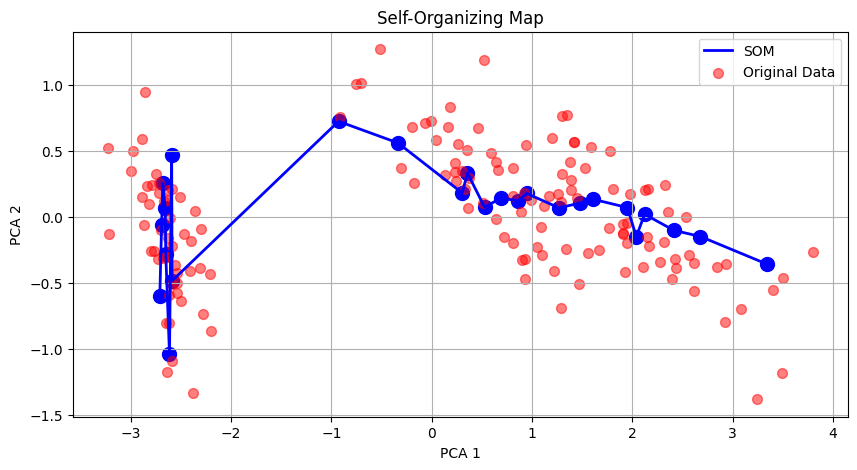

In [ ]:
# Plot the SOM values
plt.figure(figsize=(10, 5))
plt.plot(som_values[:, 0], som_values[:, 1], c='blue', linewidth=2, label="SOM")
plt.scatter(som_values[:, 0], som_values[:, 1], c='blue', s=100)
plt.grid(True)
plt.title('Self-Organizing Map')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='red', s=50, alpha=0.5, label='Original Data')
plt.legend()
plt.show()

## Problem 3


In [ ]:
#initialize params
input_dim = 2 # 2D input data
grid_dim = (10, 10) # 10x10 grid of neurons
epochs = 1000 # epochs
init_lr = 0.1 # learning rate
init_radius = max(grid_dim) / 2 #neighborhood radius
weights = np.random.rand(*grid_dim, input_dim)  #generate random weights
data = np.random.rand(1000, input_dim)  #generate random data in the unit square   

In [ ]:
# function to calculate the Euclidean distance between two points
def euclidean_distance(x, y):
    return np.sqrt(np.sum((np.array(x) - np.array(y))**2))

In [ ]:
# Training
for epoch in range(epochs):
    #update lr and radius
    lr = init_lr * (1 - epoch/epochs)
    radius = init_radius * (1 - epoch/epochs)
    
    #randomly choose point
    point = data[np.random.randint(data.shape[0])]

    #find neuron with closest weight to chosen point
    distances = np.zeros(grid_dim)
    for ix, iy in np.ndindex(grid_dim):
        distances[ix, iy] = euclidean_distance(point, weights[ix, iy])
    bmu_ix, bmu_iy = np.unravel_index(np.argmin(distances), grid_dim)
    
    #update weights of chosen neuron and neighbors
    for ix, iy in np.ndindex(grid_dim):
        dist = euclidean_distance((ix, iy), (bmu_ix, bmu_iy))
        if dist <= radius:
            # calculate the Gaussian kernel
            kernel = np.exp(-dist**2 / (2 * radius**2))
            # update weights
            weights[ix, iy] += lr * kernel * (point - weights[ix, iy])

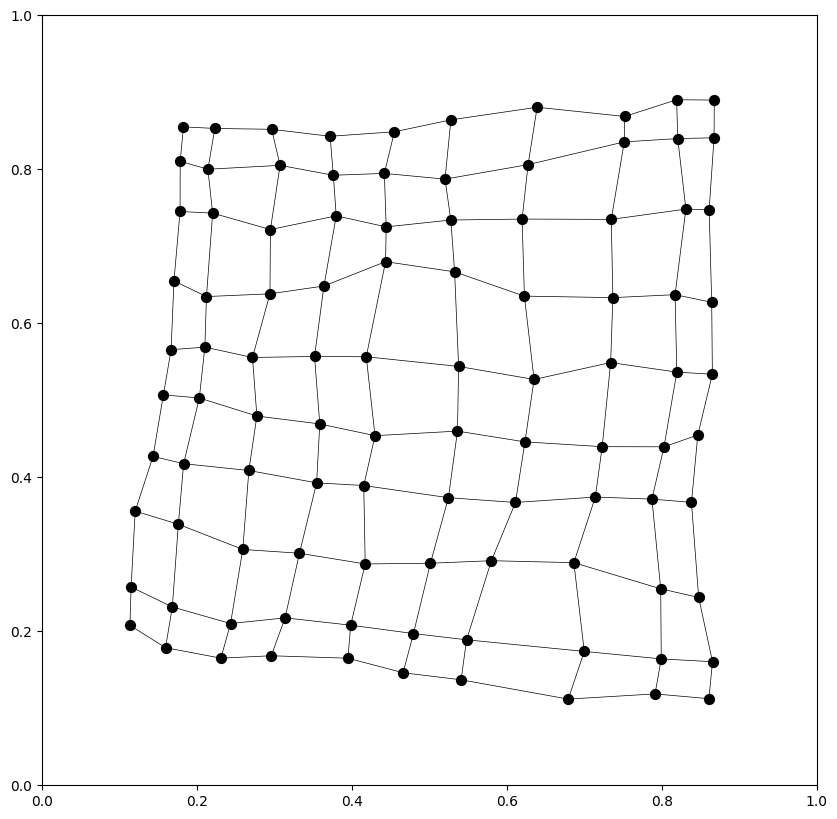

In [ ]:
# plot
plt.figure(figsize=(10, 10))
for ix, iy in np.ndindex(grid_dim):
    plt.scatter(weights[ix, iy, 0], weights[ix, iy, 1], color='k', s=50)
    if ix > 0:
        plt.plot([weights[ix, iy, 0], weights[ix-1, iy, 0]], [weights[ix, iy, 1], weights[ix-1, iy, 1]], color='k', linewidth=0.5)
    if iy > 0:
        plt.plot([weights[ix, iy, 0], weights[ix, iy-1, 0]], [weights[ix, iy, 1], weights[ix, iy-1, 1]], color='k', linewidth=0.5)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()